In [1]:
import os
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
import pandas.io.formats.style

In [2]:
os.getcwd()

'C:\\Users\\jwats\\Documents\\CodeandData\\Jupyter Notebooks'

### Loading and Cleaning DataFrame

In [3]:
df=pd.read_csv('exp_results/GROUP4-FINAL exp2b-table.csv',skiprows=6).rename(columns={})
df=df.copy().rename(columns={ 'japanese-resupply-rate':'j-resupp',
                             'japanese_supplies':'j-supp', 
                             'britain-casualties-hunger':'b-hung',
                             'britain-casualties-combat':'b-comb',
                             'japan-casualties-hunger':'j-hung',
                             'japan-casualties-combat':'j-comb', 
                             'control-imphal':'imp',
                             'control-kohima':'koh'})


In [4]:
df1=df[['ticks','j-resupp','b-hung','b-comb','j-hung','j-comb', 'imp', 'koh']].copy()
df1.loc[df1['imp']=='Britain','imp']=0.0
df1.loc[df1['imp']=='Japan','imp']=1.0
df1.loc[df1['koh']=='Britain','koh']=0.0
df1.loc[df1['koh']=='Japan','koh']=1.0
df1['koh']=df1['koh'].astype(int)
df1['imp']=df1['imp'].astype(int)
df1['j-tot']=df1['j-comb']+df1['j-hung']
df1['b-tot']=df1['b-comb']+df1['b-hung']
df1['j-per']=df1['j-comb']/df1['j-tot']
df1['b-per']=df1['b-comb']/df1['b-tot']

### Summary Stats and Regression Analysis (for tables)

In [5]:
#Summary stats
exp2b=df1.groupby('j-resupp',as_index=False).agg({'j-tot' : 'mean', 
                                               'b-tot' : 'mean',
                                               'imp':'sum',
                                               'koh':'sum',
                                               'ticks':'mean',
                                               'j-per':'mean',
                                               'b-per':'mean'})
a=exp2b.rename(columns={'j-resupp':'Re-supply Rate', 
                      'j-tot':'Axis Casualties', 
                      'b-tot':'Ally Casualties', 
                      'imp':'Imphal Captured', 
                      'koh':'Kohima Captured', 
                      'ticks':'Days', 
                      'j-per':'% Combat'})

In [6]:
b=a[['Re-supply Rate', 'Axis Casualties', 'Ally Casualties',
       'Imphal Captured', 'Kohima Captured', 'Days', '% Combat']]
b['% Combat']=b['% Combat']*100
b.round().astype(int)

C:\Users\jwats\AppData\Local\Temp\ipykernel_29296\1400606284.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  b['% Combat']=b['% Combat']*100


,Re-supply Rate,Axis Casualties,Ally Casualties,Imphal Captured,Kohima Captured,Days,% Combat
0,2,62663,32865,0,0,132,51
1,4,73922,54521,0,0,170,72
2,6,81962,87054,0,4,222,92
3,8,83286,107669,6,98,252,100
4,10,75396,115864,100,100,239,100


In [7]:
### Regression 1: casualties vs supplies
import statsmodels.api as sm

#define response variable
y = df1['j-tot']

#define predictor variables
x = df1[['j-resupp']]

#add constant to predictor variables
x = sm.add_constant(x)

#fit linear regression model
model = sm.OLS(y, x).fit()

#view model summary
print(model.params[1])
print(model.bse[1])
print(model.fvalue)
print(model.pvalues[1])
print(model.rsquared)

1741.5395000000126
89.29055493321016
380.4132315662196
2.3056172861472578e-63
0.4330686491230773


In [8]:
### Regression 2: days vs supplies
import statsmodels.api as sm

#define response variable
y = df1['ticks']

#define predictor variables
x = df1[['j-resupp']]

#add constant to predictor variables
x = sm.add_constant(x)

#fit linear regression model
model = sm.OLS(y, x).fit()

#view model summary
print(model.params[1])
print(model.bse[1])
print(model.fvalue)
print(model.pvalues[1])
print(model.rsquared)

14.84150000000001
0.3556100229940308
1741.8373803388172
1.0319641320960931e-164
0.7776624301516621


In [9]:
### Regression 4: capturing imphal vs supplies
import statsmodels.api as sm

#define response variable
y = df1['imp']

#define predictor variables
x = df1['j-resupp']

#add constant to predictor variables
x = sm.add_constant(x)

#fit linear regression model
model = sm.OLS(y, x).fit()

#view model summary
#fit linear regression model
model = sm.Logit(y, x).fit()

#view model summary
print(model.summary())
print(model.summary2())

         Current function value: 0.045394
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:                    imp   No. Observations:                  500
Model:                          Logit   Df Residuals:                      498
Method:                           MLE   Df Model:                            1
Date:                Sun, 23 Apr 2023   Pseudo R-squ.:                  0.9121
Time:                        11:54:57   Log-Likelihood:                -22.697
converged:                      False   LL-Null:                       -258.30
Covariance Type:            nonrobust   LLR p-value:                1.756e-104
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -90.8060   6079.713     -0.015      0.988    -1.2e+04    1.18e+04
j-resupp      11.0068    759.964      0.014      0.988   -1478.49

C:\Users\jwats\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [10]:
### Regression 5: capturing imphal vs supplies
import statsmodels.api as sm

#define response variable
y = df1['koh']

#define predictor variables
x = df1[['j-resupp']]

#add constant to predictor variables
x = sm.add_constant(x)

#fit linear regression model

#view model summary
#fit linear regression model
model = sm.Logit(y, x).fit()

#view model summary
print(model.summary())
print(model.summary2())

Optimization terminated successfully.
         Current function value: 0.053207
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:                    koh   No. Observations:                  500
Model:                          Logit   Df Residuals:                      498
Method:                           MLE   Df Model:                            1
Date:                Sun, 23 Apr 2023   Pseudo R-squ.:                  0.9211
Time:                        11:54:57   Log-Likelihood:                -26.604
converged:                       True   LL-Null:                       -337.30
Covariance Type:            nonrobust   LLR p-value:                3.722e-137
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -24.4075      2.951     -8.271      0.000     -30.191     -18.624
j-resupp       3.5379      0

### Data Visualizations: Scatter plots

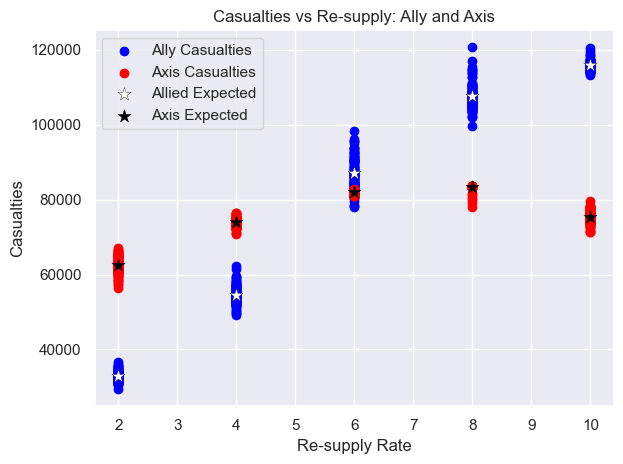

In [11]:
sns.set_theme()

plt.scatter(df1['j-resupp'], df1['b-tot'],color='blue',label='Ally Casualties', zorder=1)
plt.scatter(df1['j-resupp'], df1['j-tot'], color='red',label='Axis Casualties',zorder=1)
plt.scatter(exp2b['j-resupp'], exp2b['b-tot'],color='white',marker='*',edgecolor='black',linewidth=0.25,label='Allied Expected',zorder=2,s=100)
plt.scatter(exp2b['j-resupp'], exp2b['j-tot'], color='black',marker='*',edgecolor='black',linewidth=0.25,label='Axis Expected',zorder=2,s=100)

plt.title('Casualties vs Re-supply: Ally and Axis')
plt.xlabel('Re-supply Rate')
plt.ylabel('Casualties')
plt.legend()
plt.tight_layout()
plt.savefig('images/exp2b1.png',dpi=500)
plt.show()

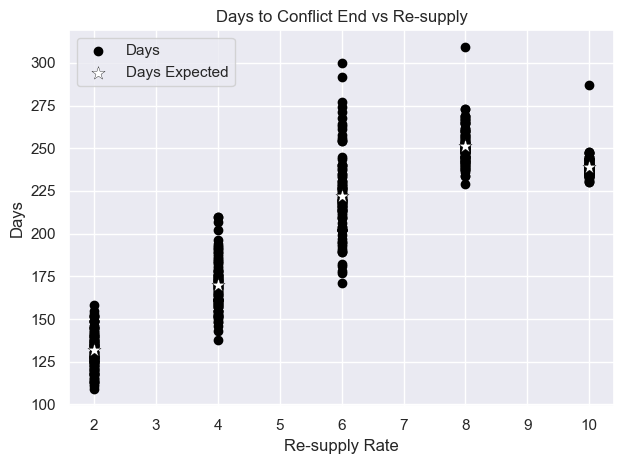

In [12]:
sns.set_theme()

plt.scatter(df1['j-resupp'], df1['ticks'],label='Days', color="black")
plt.scatter(exp2b['j-resupp'], exp2b['ticks'],label='Days Expected',color='white',marker='*',edgecolor='black',linewidth=0.25,zorder=2,s=100)
plt.title('Days to Conflict End vs Re-supply')

plt.xlabel('Re-supply Rate')
plt.ylabel('Days')
plt.legend()
plt.tight_layout()
plt.savefig('images/exp2b2.png',dpi=500)
plt.show()